# Rapport  du Projet de Prédiction de Consommation de Carburant

---

## **Vue d'ensemble du Projet**
Ce projet se concentre sur le développement d'un modèle prédictif pour classifier la consommation de carburant des voitures comme étant élevée ou faible. Le jeu de données, intitulé "Auto", contient divers attributs des véhicules, avec comme métrique clé "mpg" (miles par gallon), représentant l'efficacité énergétique. Pour simplifier la tâche de classification, une variable binaire, `mpg01`, est introduite :
- `mpg01 = 1` si `mpg` dépasse sa médiane.
- `mpg01 = 0` sinon.

L'objectif principal est de construire et évaluer un modèle de classification fiable pour prédire `mpg01` à partir des attributs du véhicule.

---

## **Jeu de Données et Prétraitement**
- **Jeu de données** : Le jeu de données "Auto" contient des attributs tels que `mpg`, `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model year`, `origin` et `car name`.
- **Nettoyage des données** :
  - **Valeurs manquantes** : Visualisées et traitées à l'aide de heatmaps de seaborn.
  - **Valeurs aberrantes** : Identifiées à l'aide des bornes basées sur l'IQR et corrigées pour la cohérence.
    - **Valeurs aberrantes détectées** : 
      - `mpg` : 1 valeur aberrante.
      - `acceleration` : 7 valeurs aberrantes.
  - **Duplications** : Vérifiées et confirmées inexistantes.
  - **Transformation des variables** :
    - `horsepower` converti en format numérique à l'aide de `LabelEncoder`.
    - `mpg` transformé en variable binaire `mpg01`.
  - **Mise à l'échelle des variables** : MinMaxScaler appliqué pour normaliser le jeu de données.

---

## **Analyse Exploratoire des Données**
1. **Analyse des valeurs manquantes** :
   - Aucune valeur manquante trouvée dans les variables catégoriques ou numériques après traitement.
2. **Visualisation** :
   - **Nuages de points** :
     - Relations entre `mpg` et d'autres variables comme `displacement` et `horsepower` visualisées.
     - Exemple de graphique :
     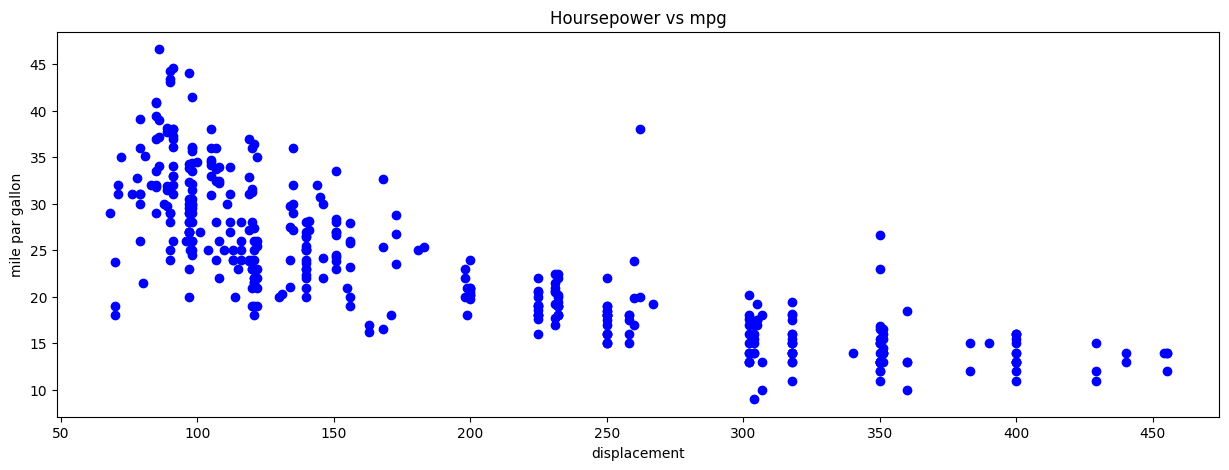
   - **Histogrammes** :
     - Distributions multimodales dans `displacement` et échelles logarithmiques pour `mpg`.
     - Exemple de graphique :
      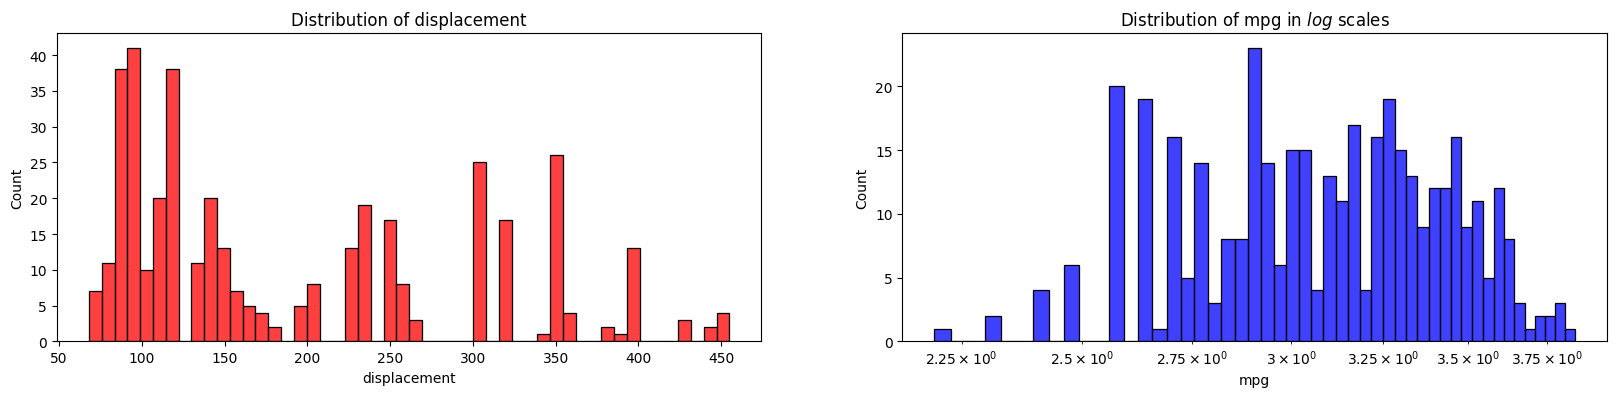
   - **Boîtes à moustaches** :
     - Utilisées pour visualiser les valeurs aberrantes dans `cylinders`, `displacement`, `horsepower` et `acceleration`.
     - Exemple de graphique :
       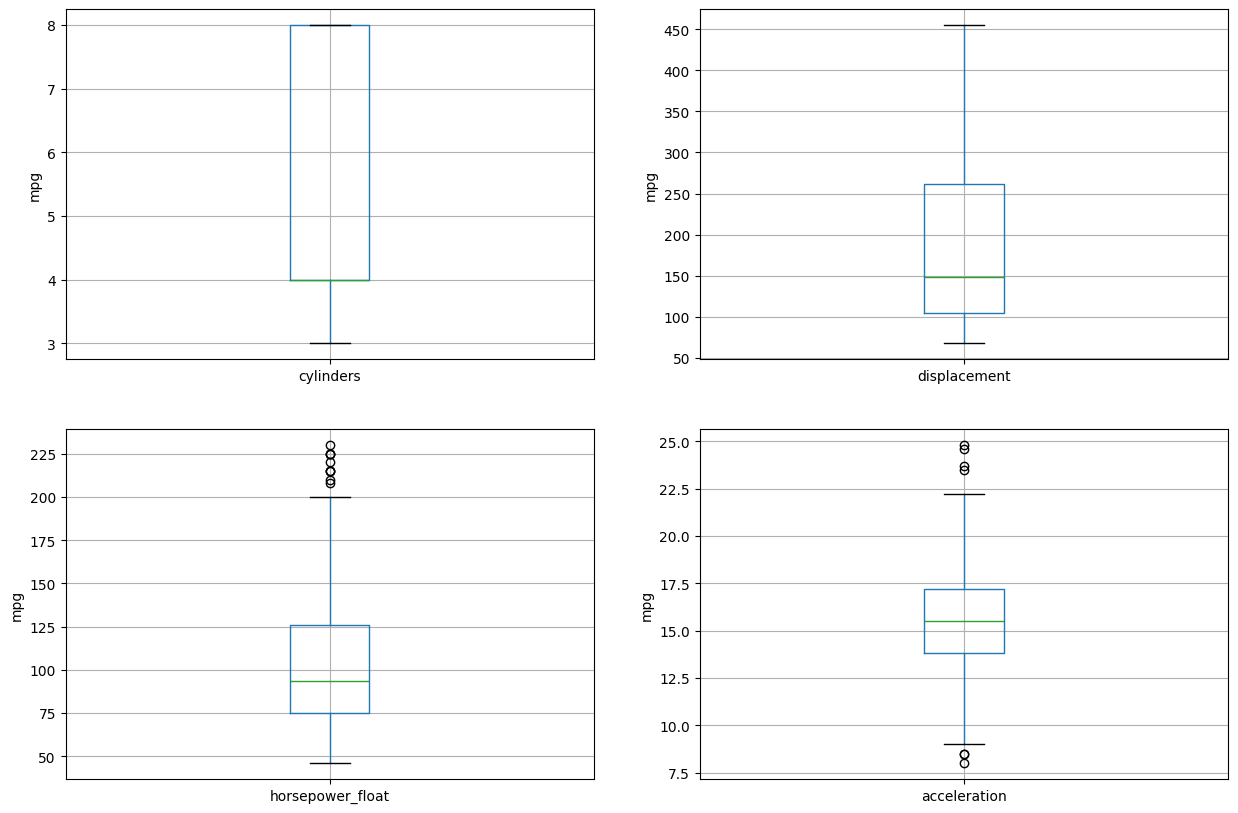
   - **Carte de corrélation** :
     - Corrélations négatives fortes identifiées pour `cylinders`, `displacement` et `weight` avec `mpg`.
     - Corrélations inter-variables élevées entre `cylinders`, `displacement` et `weight`.
     - Exemple de carte :
        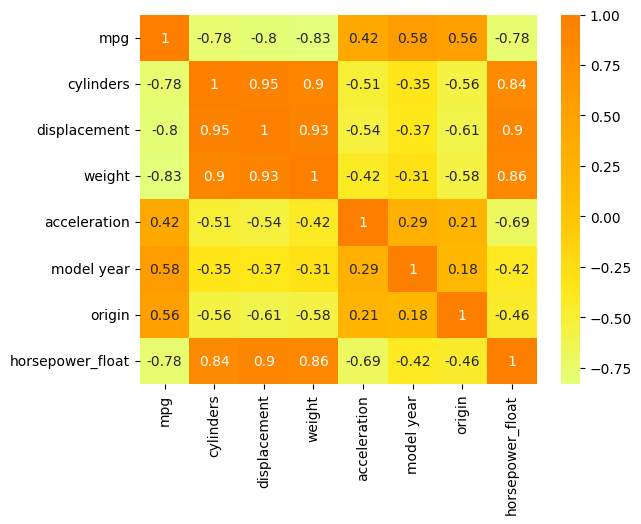

3. **Détection des valeurs aberrantes** :
   - Valeurs aberrantes significatives corrigées, notamment dans `acceleration` et `mpg`.

4. **Analyse tabulaire** :
   - Résumé des variables numériques avant et après la correction des valeurs aberrantes :

| Variable       | Valeurs aberrantes | Min (Original) | Max (Original) | Min (Corrigé) | Max (Corrigé) |
|----------------|--------------------|----------------|----------------|----------------|----------------|
| `mpg`         | 1                  | 0.25           | 46.25          | 0.25           | 46.25          |
| `acceleration`| 7                  | 8.8            | 22.2           | 8.8            | 22.2           |
| `horsepower`  | 0                  | 0.1            | 1.0            | 0.1            | 1.0            |

---

## **Modélisation et Évaluation**
### **Partitionnement des données**
- **Division des données** :
  - 75 % pour l'entraînement.
  - 25 % pour le test.
  - Random state fixé à 42 pour la reproductibilité.

### **Modèle 1 : Analyse Discriminante Linéaire (LDA)**
- **Résultats** :
  - Précision : 95 %.
  - Erreur de test : 5 %.
  - Précision : 97,3 %, Rappel : 96 %, Score F1 : 96,6 %.
- **Vérification du surapprentissage** : La précision d'entraînement était similaire (94,97 %), indiquant l'absence de surapprentissage significatif.

### **Modèle 2 : Analyse Discriminante Quadratique (QDA)**
- **Résultats** :
  - Précision : 95 %.
  - Erreur de test : 5 %.
  - Précision : 97,3 %, Rappel : 96 %, Score F1 : 96,6 %.
- **Vérification du surapprentissage** : La précision d'entraînement (95,64 %) indiquait un léger surapprentissage par rapport à LDA.

### **Modèle 3 : Régression Logistique**
- **Résultats** :
  - Précision : 96 %.
  - Erreur de test : 4 %.
  - Précision : 97,3 %, Rappel : 97,3 %, Score F1 : 97,3 %.
- **Vérification du surapprentissage** : La précision d'entraînement était légèrement inférieure à 93 %, avec un score F1 de 95,2 %.

### **Modèle 4 : k-Nearest Neighbors (KNN)**
- **Explication Détaillée** :
  1. **Bibliothèques Importées** :

   ```python
   import matplotlib.pyplot as plt
   from sklearn.neighbors import KNeighborsClassifier
   from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
   import seaborn as sns
   ```

   2. **Optimisation de `k`** :

   ```python
   k_values = range(1, 21)
   test_errors = []
   min_error = 1.0
   best_k = 0

   for k in k_values:
       knn = KNeighborsClassifier(n_neighbors=k)
       knn.fit(X_train, y_train)
       y_pred = knn.predict(X_test)
       error = 1 - accuracy_score(y_test, y_pred)
       test_errors.append(error)

       if error < min_error:
           min_error = error
           best_k = k
   ```
   - Test des valeurs de `k` entre 1 et 20.
   - Calcul de l'erreur de test pour chaque `k`.

3. **Entraînement et Évaluation** :

   ```python
   knn = KNeighborsClassifier(n_neighbors=best_k)
   knn.fit(X_train, y_train)
   y_pred = knn.predict(X_test)

   print("Précision :", accuracy_score(y_test, y_pred))
   print("Rappel :", recall_score(y_test, y_pred))
   print("Score F1 :", f1_score(y_test, y_pred))
   ```

4. **Visualisation** :

   ```python
   plt.plot(k_values, test_errors)
   plt.xlabel("K")
   plt.ylabel("Erreur de test")
   plt.title("Erreur de test en fonction de K")
   plt.show()
   ```
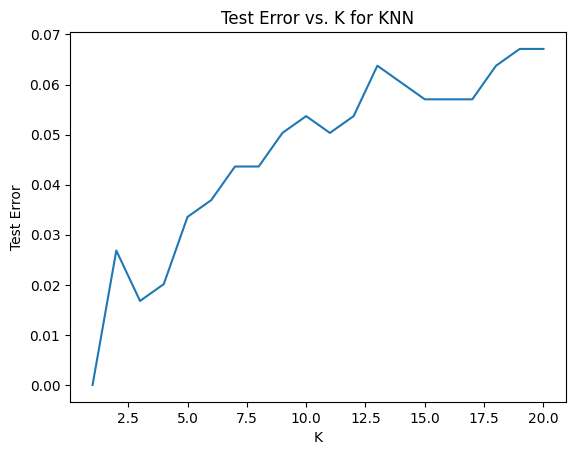

- **Optimisation des hyperparamètres** :
  - Valeurs de `k` testées de 1 à 20.
  - `k` optimal = 1 avec une erreur de test de 1 %.
- **Résultats** :
  - Précision : 99 %.
  - Précision : 100 %, Rappel : 98,6 %, Score F1 : 99,3 %.
  - La précision d'entraînement a atteint la perfection (100 %) en raison de la taille du jeu de données.
- **Analyse des erreurs** :
  - Erreur de test minimale mais potentiel de surapprentissage en raison de la petite taille du jeu de données et de la faible généralisation.

---

## **Conclusion**
Ce projet a démontré avec succès la capacité à prédire l'efficacité énergétique des voitures à l'aide de divers modèles d'apprentissage supervisé. Bien que KNN ait atteint la plus haute précision (99 %), il pourrait présenter des problèmes de surapprentissage, tandis que la régression logistique a fourni une alternative plus équilibrée. Les résultats soulignent l'importance de la gestion des valeurs aberrantes et de la mise à l'échelle des variables pour une performance robuste des modèles.

---

